In [16]:
import pandas as pd
import numpy as np

# New Section

In [3]:
df = pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [4]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000
...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,1999,953,694,175000
1456,20,RL,85.0,13175,Pave,Reg,1978,2073,0,210000
1457,70,RL,66.0,9042,Pave,Reg,1941,1188,1152,266500
1458,20,RL,68.0,9717,Pave,Reg,1950,1078,0,142125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
import datetime
datetime.datetime.now().year

2025

In [7]:
df["Total years"] = datetime.datetime.now().year - df["YearBuilt"]

In [8]:
df.drop("YearBuilt",axis=1,inplace=True)

In [12]:
cat_features = ["MSSubClass", "MSZoning", "Street", "LotShape"]
output = ["SalePrice"]

In [13]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}

for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [14]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total years
0,5,3,65.0,8450,1,3,856,854,208500,22
1,0,3,80.0,9600,1,3,1262,0,181500,49
2,5,3,68.0,11250,1,0,920,866,223500,24
3,6,3,60.0,9550,1,0,961,756,140000,110
4,5,3,84.0,14260,1,0,1145,1053,250000,25
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,26
1456,0,3,85.0,13175,1,3,2073,0,210000,47
1457,6,3,66.0,9042,1,3,1188,1152,266500,84
1458,0,3,68.0,9717,1,3,1078,0,142125,75


In [17]:
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [18]:
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [19]:
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [20]:
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [27]:
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y
#output

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [28]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]
cat_dims
#unique elements in each cat_col

[15, 5, 2, 4]

In [29]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]
embedding_dim
#input dimension is 15 , output dimension is 8

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [30]:
#data preprocessing done

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [32]:
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [33]:
embedding_val

[tensor([[ 1.8445, -1.3989,  1.3764,  ...,  0.4061,  0.9057, -0.4466],
         [-0.5376, -0.1492,  1.5304,  ...,  0.8907,  0.5733,  0.5456],
         [ 1.8445, -1.3989,  1.3764,  ...,  0.4061,  0.9057, -0.4466],
         ...,
         [-0.0224, -1.1268, -0.7756,  ..., -2.0806,  0.4961, -0.5445],
         [-0.5376, -0.1492,  1.5304,  ...,  0.8907,  0.5733,  0.5456],
         [-0.5376, -0.1492,  1.5304,  ...,  0.8907,  0.5733,  0.5456]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.9272, -0.7633,  0.9549],
         [ 0.9272, -0.7633,  0.9549],
         [ 0.9272, -0.7633,  0.9549],
         ...,
         [ 0.9272, -0.7633,  0.9549],
         [ 0.9272, -0.7633,  0.9549],
         [ 0.9272, -0.7633,  0.9549]], grad_fn=<EmbeddingBackward0>),
 tensor([[1.5501],
         [1.5501],
         [1.5501],
         ...,
         [1.5501],
         [1.5501],
         [1.5501]], grad_fn=<EmbeddingBackward0>),
 tensor([[1.6446, 0.8098],
         [1.6446, 0.8098],
         [0.4551, 1.3178],
     

In [34]:
z = torch.cat(embedding_val, 1)
z
#concatenation

tensor([[ 1.8445, -1.3989,  1.3764,  ...,  1.5501,  1.6446,  0.8098],
        [-0.5376, -0.1492,  1.5304,  ...,  1.5501,  1.6446,  0.8098],
        [ 1.8445, -1.3989,  1.3764,  ...,  1.5501,  0.4551,  1.3178],
        ...,
        [-0.0224, -1.1268, -0.7756,  ...,  1.5501,  1.6446,  0.8098],
        [-0.5376, -0.1492,  1.5304,  ...,  1.5501,  1.6446,  0.8098],
        [-0.5376, -0.1492,  1.5304,  ...,  1.5501,  1.6446,  0.8098]],
       grad_fn=<CatBackward0>)

In [35]:
final_embed = nn.Dropout(0.4)(z)
final_embed

tensor([[ 3.0741, -2.3315,  2.2940,  ...,  2.5835,  0.0000,  1.3496],
        [-0.8959, -0.2487,  0.0000,  ...,  2.5835,  2.7410,  0.0000],
        [ 3.0741, -0.0000,  2.2940,  ...,  2.5835,  0.0000,  0.0000],
        ...,
        [-0.0374, -0.0000, -0.0000,  ...,  2.5835,  2.7410,  0.0000],
        [-0.8959, -0.2487,  0.0000,  ...,  0.0000,  2.7410,  0.0000],
        [-0.8959, -0.2487,  0.0000,  ...,  0.0000,  2.7410,  1.3496]],
       grad_fn=<MulBackward0>)

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [52]:
model = FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [53]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [54]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [55]:
cont_values.shape

torch.Size([1201, 5])

In [56]:
batch_size = 1200
test_size = int(batch_size * 0.15)
train_cat = cat_features[:batch_size-test_size]
test_cat = cat_features[batch_size-test_size:batch_size]
train_cont = cont_values[:batch_size-test_size]
test_cont = cont_values[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]



In [57]:
len(train_cat),len(test_cat),len(train_cont),len(test_cont),len(y_train),len(y_test)


(1020, 180, 1020, 180, 1020, 180)

In [59]:
epochs=5000
final_loss = []
for i in range(epochs):
  i = i+1
  y_pred = model(train_cat,train_cont)
  loss = torch.sqrt(loss_function(y_pred,y_train))
  final_loss.append(loss)
  if i%10==1:
    print("Epoch number: {} and the loss is: {}".format(i,loss.item()))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch number: 1 and the loss is: 196395.40625
Epoch number: 11 and the loss is: 196178.953125
Epoch number: 21 and the loss is: 196004.234375
Epoch number: 31 and the loss is: 195859.8125
Epoch number: 41 and the loss is: 195637.171875
Epoch number: 51 and the loss is: 195520.0
Epoch number: 61 and the loss is: 195342.671875
Epoch number: 71 and the loss is: 195081.5625
Epoch number: 81 and the loss is: 194875.78125
Epoch number: 91 and the loss is: 194736.828125
Epoch number: 101 and the loss is: 194480.390625
Epoch number: 111 and the loss is: 194412.53125
Epoch number: 121 and the loss is: 194166.5
Epoch number: 131 and the loss is: 193945.390625
Epoch number: 141 and the loss is: 193723.34375
Epoch number: 151 and the loss is: 193526.078125
Epoch number: 161 and the loss is: 193305.265625
Epoch number: 171 and the loss is: 193045.015625
Epoch number: 181 and the loss is: 192851.1875
Epoch number: 191 and the loss is: 192732.609375
Epoch number: 201 and the loss is: 192423.71875
Epo

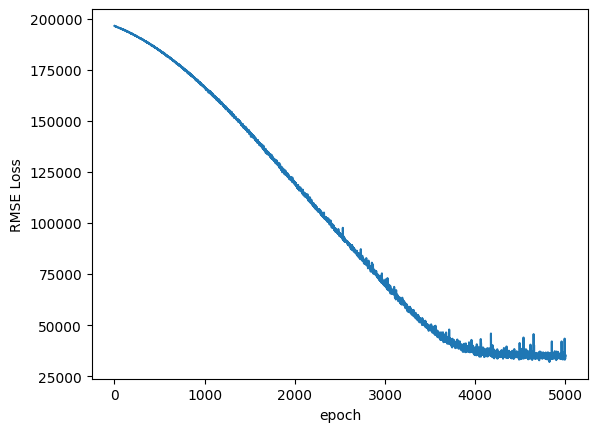

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

final_loss_np = np.array([loss.detach().item() for loss in final_loss])
plt.plot(range(epochs), final_loss_np)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [68]:
y_pred = ""
with torch.no_grad():
  y_pred = model(test_cat,test_cont)
  loss = torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 46318.8515625


In [70]:
data_actual = pd.DataFrame(y_test.numpy())
data_predicted = pd.DataFrame(y_pred.numpy())
data_pred = pd.concat([data_actual,data_predicted],axis=1)
data_pred.columns = ['data_actual','data_predicted']
data_pred.head()

,data_actual,data_predicted
0,130000.0,168471.937500
1,138887.0,156036.265625
2,175500.0,166245.031250
3,195000.0,281428.625000
4,142500.0,201839.093750
